## Iris 데이터를 이용한 SVM 커널 실습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

data = iris.data
target = iris.target

In [3]:
data = data[target !=0, :2]
target = target[target != 0]

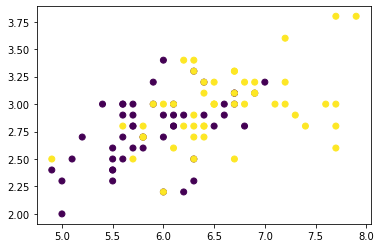

In [4]:
plt.scatter(data[:, 0], data[:, 1], c=target)

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.9, random_state=2021
)

## 2. Linear Kernel

In [6]:
from sklearn.svm import SVC

우선 가장 기본적인 svm 커널인 linear 커널을 사용.

In [7]:
linear_svc = SVC(kernel='linear')

In [8]:
linear_svc.fit(train_data, train_target)

SVC(kernel='linear')

아래는 svm의 결과를 시각화 하기 위한 함수.

In [12]:
def plot_support_vector_machine(svm):
    # 전체 데이터
    plt.scatter(data[:, 0], data[:, 1], c=target, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
    # test 데이터
    plt.scatter(test_data[:, 0], test_data[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = data[:, 0].min()
    x_max = data[:, 0].max()
    y_min = data[:, 1].min()
    y_max = data[:, 1].max()
    
    # 영역 칠하기
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading="auto")
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

- decision boundary
    - 검은색 직선
    
- support vector
    - 검은색 점선
    
- 영역
    - 클래스로 구별되는 영역

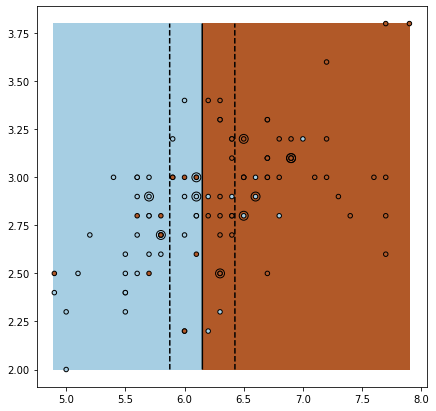

In [14]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(linear_svc)

- 2차원 직선으로 봤을 경우, 구분하지 못하는 데이터들 또한 존재함.

## 3. Poly Kernel

- 다음으로 알아볼 커널은 poly 커널.

    - Poly커널: 직선을 곡선으로 mapping 시켜주는 커널.
        - gamma
            - 결정 경계를 scaling 해주는 값.
        - degree
            - 몇 차원의 곡선으로 mapping 할지 정해주는 값.

### 3.1 gamma

### 3.1.1 'Scale'

- default 옵션은 자동으로 scaling 해줌.

In [15]:
poly_svc = SVC(kernel='poly')

In [16]:
poly_svc.fit(train_data, train_target)

SVC(kernel='poly')

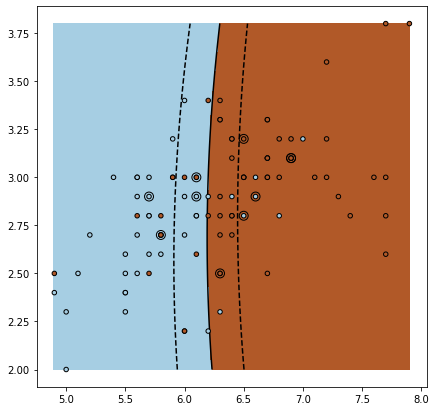

In [17]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(poly_svc)

### 3.1.2 gamma=0.1

- gamma 값을 작게 준다면?

In [18]:
poly_svc = SVC(kernel='poly', gamma=0.1)
poly_svc.fit(train_data, train_target)

SVC(gamma=0.1, kernel='poly')

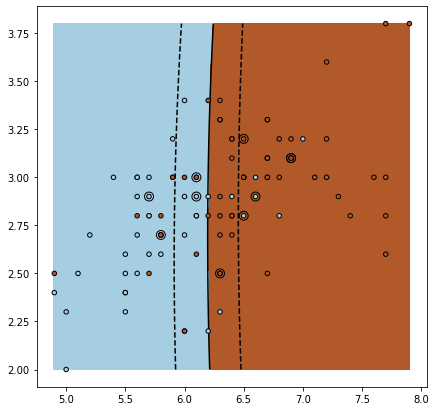

In [19]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(poly_svc)

### 3.1.3 gamma=10

- gamma 값을 크게 준다면?

In [20]:
poly_svc = SVC(kernel='poly', gamma=10)
poly_svc.fit(train_data, train_target)

SVC(gamma=10, kernel='poly')

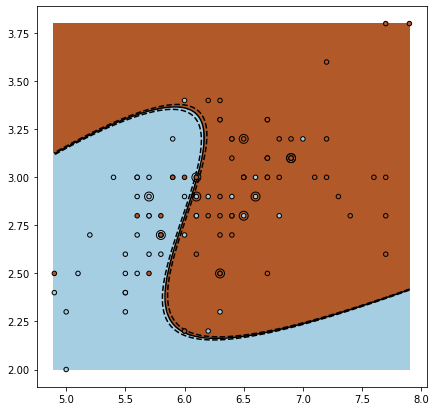

In [21]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(poly_svc)

### 3.2 degree

### 3.2.1 degree=2

In [22]:
poly_svc = SVC(kernel='poly', gamma=10, degree=2)
poly_svc.fit(train_data, train_target)

SVC(degree=2, gamma=10, kernel='poly')

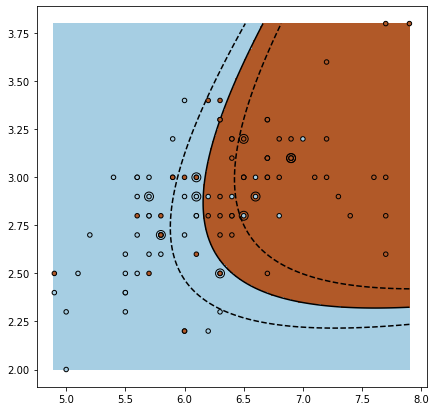

In [23]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(poly_svc)

### 3.2.2 degree=4

In [24]:
poly_svc = SVC(kernel='poly', gamma=10, degree=4)
poly_svc.fit(train_data, train_target)

SVC(degree=4, gamma=10, kernel='poly')

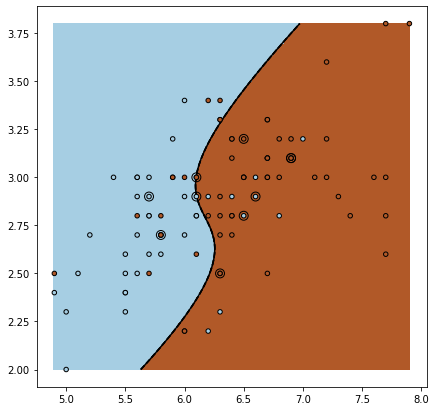

In [25]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(poly_svc)

## 4. RBF Kernel

- 데이터를 고차원의 공간으로 mapping.
- rbf또한 gamma 값으로 scaling.

### 4.1 'scale'

In [26]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(train_data, train_target)

SVC()

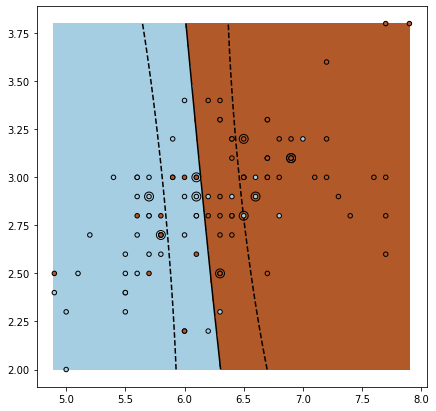

In [27]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)

### 4.2 gamma=0.1

In [28]:
# default
rbf_svc = SVC(kernel='rbf', gamma=0.1)
rbf_svc.fit(train_data, train_target)

SVC(gamma=0.1)

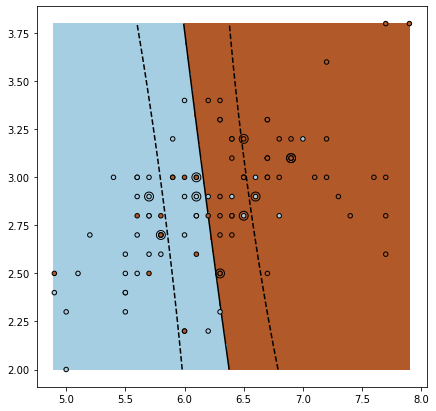

In [29]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)

### 4.3 gamma=10

In [32]:
# 3차원으로 mapping을 시킨 후 hyperplane으로 데이터를 나눔.
# 등고선이 생김.
rbf_svc = SVC(kernel='rbf', gamma=10)
rbf_svc.fit(train_data, train_target)

SVC(gamma=10)

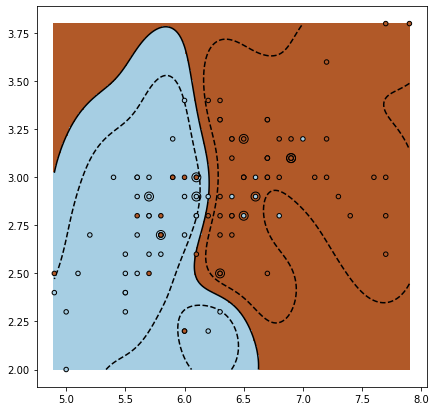

In [33]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)

## 5. Penalty

- C argument를 통해 줄 수 있음.

### 5.1 Poly

In [34]:
# default
poly_svc = SVC(kernel='poly', gamma=10)
poly_svc.fit(train_data, train_target)

SVC(gamma=10, kernel='poly')

In [35]:
hard_penalty_poly_svc = SVC(kernel='poly', gamma=10, C=100)
hard_penalty_poly_svc.fit(train_data, train_target)

SVC(C=100, gamma=10, kernel='poly')

Text(0.5, 1.0, 'Hard penalty')

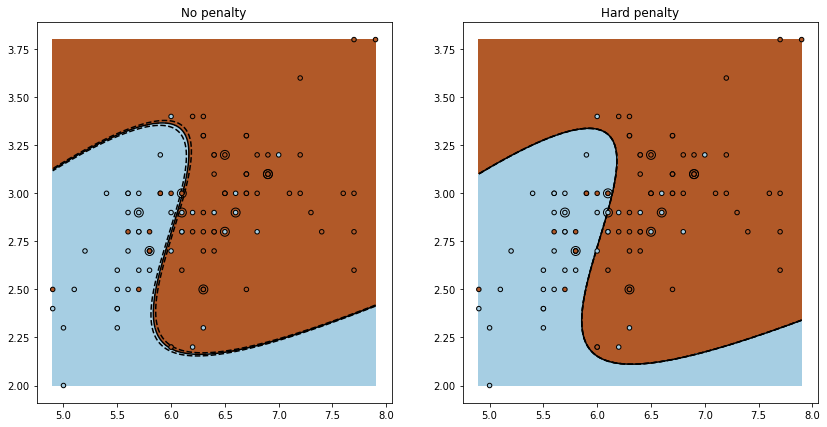

In [36]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plot_support_vector_machine(poly_svc)
plt.title('No penalty')
plt.subplot(1, 2, 2)
plot_support_vector_machine(hard_penalty_poly_svc)
plt.title('Hard penalty')

- Support Vector가 먼지 가까운지의 차이.
    - Poly는 이미 최대로 적합을 시켰기 때문.
    - 더 이상의 페널티를 반영해서 모델을 생성할 수 없음.

### 5.2 RBF

- Penalty가 더욱 잘 반영.

In [37]:
rbf_svc = SVC(kernel='rbf', gamma=10)
rbf_svc.fit(train_data, train_target)

SVC(gamma=10)

In [38]:
hard_penalty_svc = SVC(kernel='rbf', gamma=10, C=100)
hard_penalty_svc.fit(train_data, train_target)

SVC(C=100, gamma=10)

Text(0.5, 1.0, 'Hard penalty')

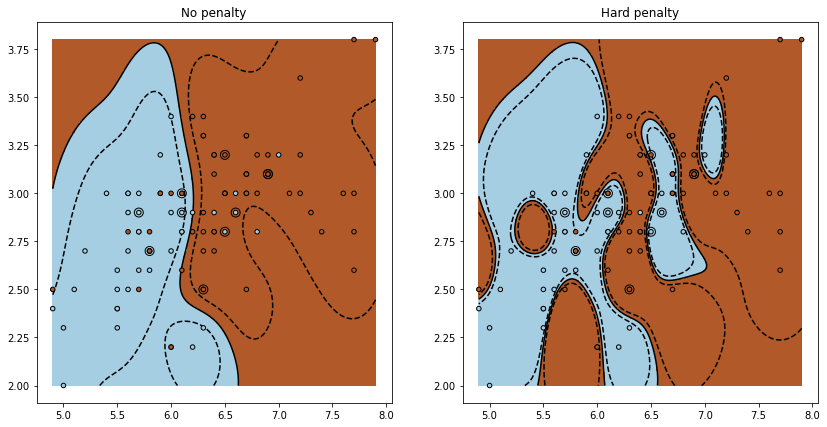

In [39]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plot_support_vector_machine(rbf_svc)
plt.title('No penalty')
plt.subplot(1, 2, 2)
plot_support_vector_machine(hard_penalty_svc)
plt.title('Hard penalty')

- 왼쪽에서는 어느 정도의 Penalty를 허용. 하늘색과 갈색이 같이 있음.